In [93]:
import torch
import random
from torch import nn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [96]:
def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [97]:
def avgpool2d(X, pool_size):
    h,w = pool_size 
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
               Y[i, j] = X[i: i + h, j: j + w].mean()
        
    return Y

In [98]:
def maxpool2d(X, pool_size):
    h,w = pool_size 
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
               Y[i, j] = X[i: i + h, j: j + w].max()
        
    return Y

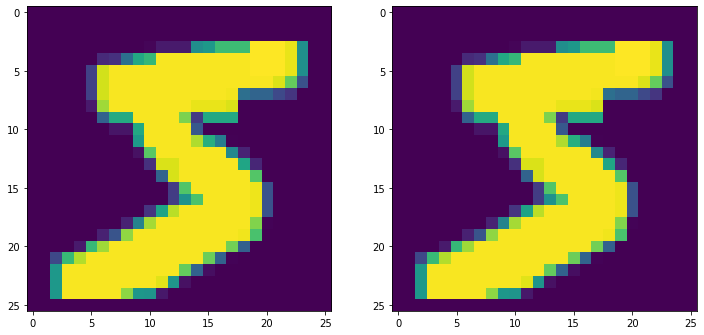

In [99]:
X = (X_train[0]).astype(np.float32)

torch_pool = torch.nn.MaxPool2d((3,3), stride=1, padding=0)
out_torch = torch_pool(torch.tensor(X).reshape(1,28,28))

out_np = maxpool2d(X, (3,3))
_, axs = plt.subplots(1, 2, figsize=(12, 12))
imgs = [ maxpool2d(X,(3,3)), out_torch.reshape(out_np.shape)]
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [89]:
def maxpool2d_backward(d_out, pool_size):
    
    out_h, out_w = d_out.shape
    dx = np.zeros(d_out.shape)
    for i in range(out_h):
      for j in range(out_w):
        x_pool = d_out[i*1 : i * 1 + out_h, j* 1 : j*1 + out_w]
        mask = (x_pool == np.max(x_pool))# keeps track of where the maximum of the matrix is
        dx[i*1 : i * 1 + out_h, j* 1 : j*1 + out_w] = mask*d_out[i,j]
    return dx
        


torch_pool(X_train[0])

In [107]:
out = maxpool2d(X,(3,3))
d_out = np.random.randn(26,26)
d_x = maxpool2d_backward(d_out, (3,3))
d_out.mean()

-0.03352065768453229